In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('bruno_db.csv')

In [ ]:
genre_counts = df['Genre'].value_counts()

Genre
 Drama         245
Action         215
 Thriller      159
 Adventure     140
Drama          131
Comedy         114
 Comedy         94
 Mystery        76
 Horror         75
Animation       67
 Crime          65
 Romance        64
Biography       53
Horror          51
 Sci-Fi         40
 Fantasy        39
 History        38
Crime           36
Adventure       29
 Family         25
 Action         21
 Music          16
 Musical        15
 Sport          10
 Biography       7
 War             7
Documentary      6
Fantasy          5
 Western         3
Sci-Fi           2
Mystery          2
Music            1
Thriller         1
 Animation       1
Name: count, dtype: int64


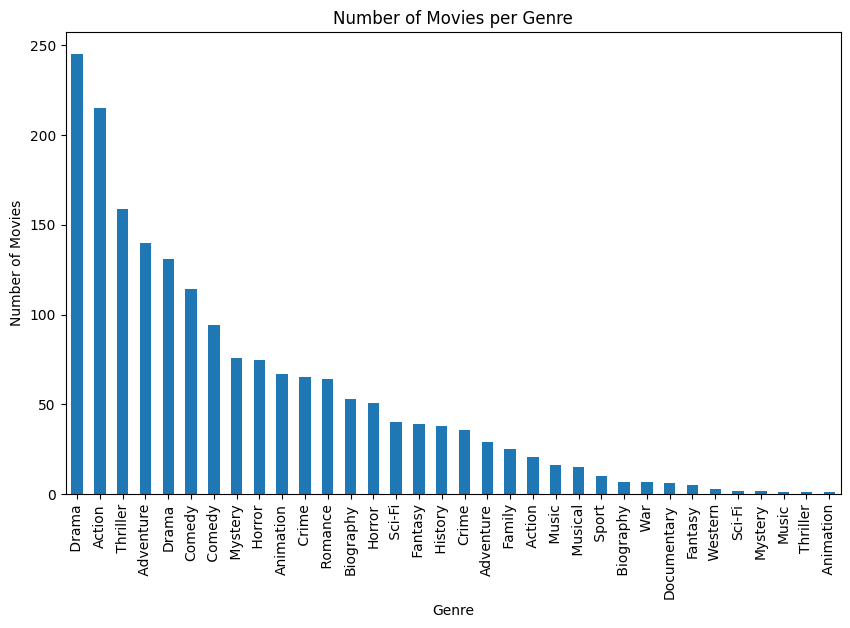

In [4]:
plt.figure(figsize=(10,6))
genre_counts.plot(kind='bar')
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

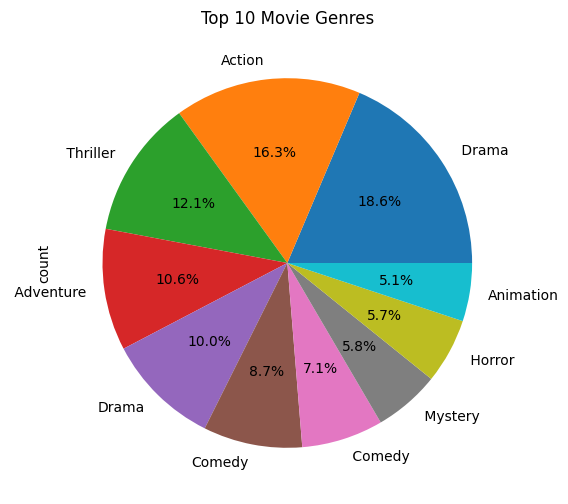

In [5]:
plt.figure(figsize=(10,6))
genre_counts[:10].plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 10 Movie Genres')
plt.show()

In [6]:
print(df.columns)

Index(['Title', 'Year', 'BoxOffice', 'budget', 'popularity',
       'production_companies', 'revenue', 'runtime', 'Internet Movie Database',
       'Rotten Tomatoes', 'Metacritic', 'Genre'],
      dtype='object')


In [7]:
production_companies = df.groupby('production_companies').agg({
    'revenue': 'mean',
    'Rotten Tomatoes': 'mean',
    'Internet Movie Database': 'mean'
}).reset_index()

top_earners_production_companies = production_companies.sort_values(by='revenue', ascending=False).head(10)
print(top_earners_production_companies)

                                  production_companies      revenue  \
3        20th Century Studios,Lightstorm Entertainment  2320.250281   
357   Marvel Studios,Pascal Pictures,Columbia Pictures  1921.847111   
519  Skydance Media,Don Simpson/Jerry Bruckheimer F...  1488.732821   
329  LuckyChap Entertainment,Heyday Films,NB/GG Pic...  1445.638421   
596           Universal Pictures,Illumination,Nintendo  1362.000000   
356  Marvel Studios,Maximum Effort,21 Laps Entertai...  1338.073645   
638  Walt Disney Pictures,Walt Disney Animation Stu...  1059.544057   
62             Amblin Entertainment,Universal Pictures  1001.978080   
542  Syncopy,Universal Pictures,Atlas Entertainment...   952.000000   
192                EON Productions,Metro-Goldwyn-Mayer   774.153024   

     Rotten Tomatoes  Internet Movie Database  
3               76.0                     75.0  
357             93.0                     82.0  
519             96.0                     82.0  
329             88.0      

/tmp/ipykernel_52346/840573224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='production_companies', data=top_earners_production_companies, palette='viridis')


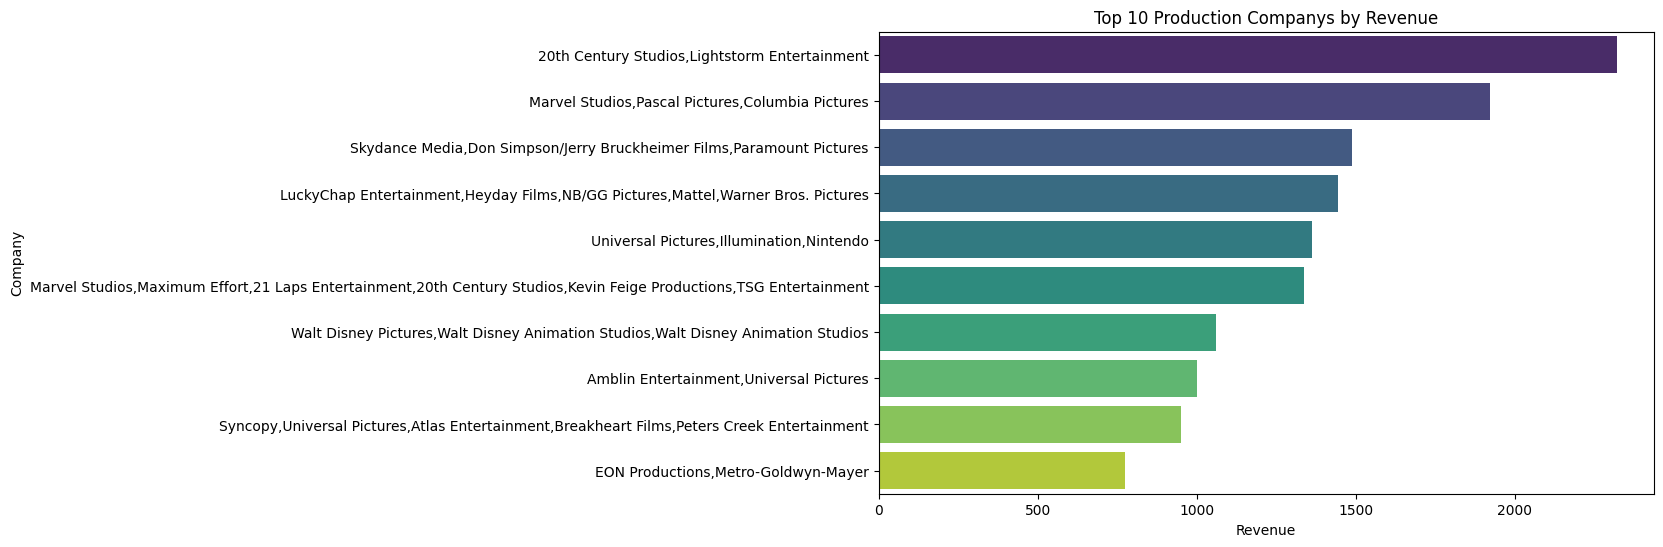

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='production_companies', data=top_earners_production_companies, palette='viridis')
plt.title('Top 10 Production Companys by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Company')
plt.show()

/tmp/ipykernel_52346/123934619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rotten Tomatoes', y='production_companies', data=top_rated_production_companies, palette='viridis')


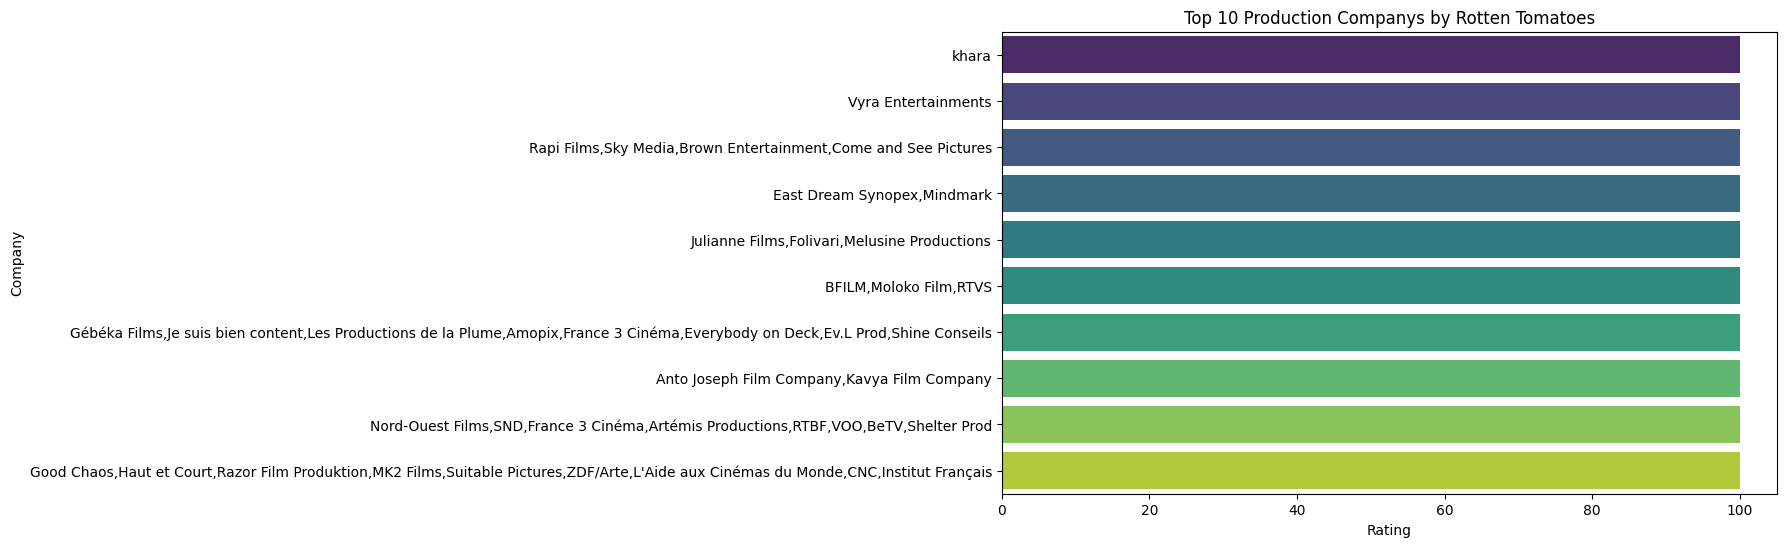

In [9]:
top_rated_production_companies = production_companies.sort_values(by='Rotten Tomatoes', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Rotten Tomatoes', y='production_companies', data=top_rated_production_companies, palette='viridis')
plt.title('Top 10 Production Companys by Rotten Tomatoes')
plt.xlabel('Rating')
plt.ylabel('Company')
plt.show()

In [10]:
print(df.columns)

Index(['Title', 'Year', 'BoxOffice', 'budget', 'popularity',
       'production_companies', 'revenue', 'runtime', 'Internet Movie Database',
       'Rotten Tomatoes', 'Metacritic', 'Genre'],
      dtype='object')


/tmp/ipykernel_52346/2021310506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='Genre', data=genre_financial_data, palette='viridis')


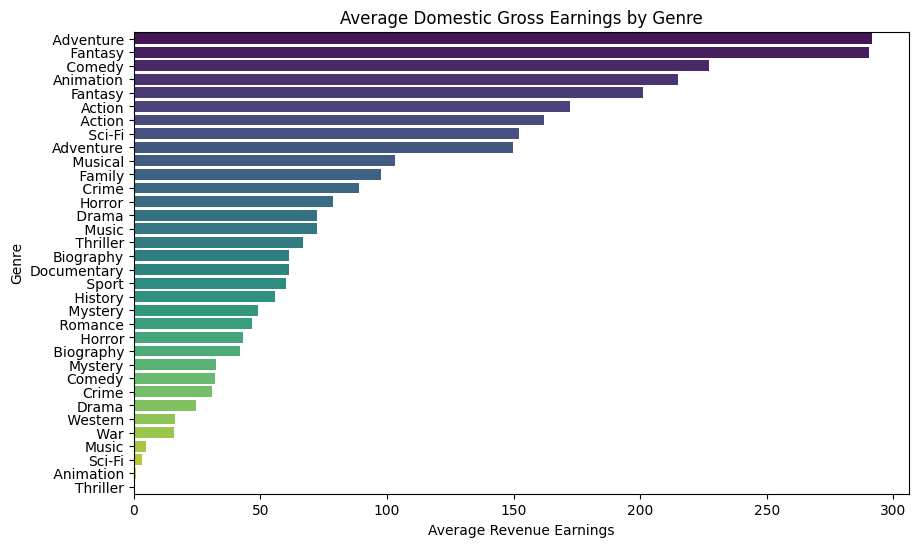

In [11]:
genre_financial_data = df.groupby('Genre').agg({
    'revenue': 'mean'}).reset_index()
genre_financial_data = genre_financial_data.sort_values(by='revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='revenue', y='Genre', data=genre_financial_data, palette='viridis')
plt.title('Average Domestic Gross Earnings by Genre')
plt.xlabel('Average Revenue Earnings')
plt.ylabel('Genre')
plt.show()

/tmp/ipykernel_52346/1705324362.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='revenue', y='Genre', data=df, palette='viridis')


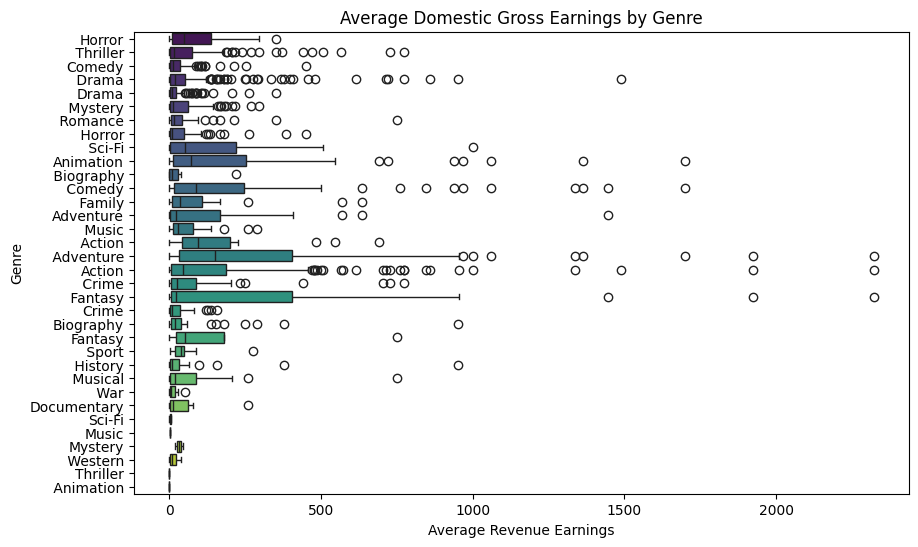

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='revenue', y='Genre', data=df, palette='viridis')
plt.title('Average Domestic Gross Earnings by Genre')
plt.xlabel('Average Revenue Earnings')
plt.ylabel('Genre')
plt.show()

In [13]:
genre_year_data = df.groupby(['Year', 'Genre']).size().reset_index(name='count')
print(genre_year_data)

     Year       Genre  count
0    2021      Action      3
1    2021   Adventure     26
2    2021   Animation      1
3    2021   Biography      1
4    2021      Comedy     20
..    ...         ...    ...
115  2024     Fantasy      3
116  2024      Horror     18
117  2024       Music      1
118  2024     Mystery      1
119  2024      Sci-Fi      1

[120 rows x 3 columns]


In [14]:
genre_year_pivot = genre_year_data.pivot(index='Year', columns='Genre', values='count').fillna(0)
print(genre_year_pivot)

Genre   Action   Adventure   Animation   Biography   Comedy   Crime   Drama  \
Year                                                                          
2021       3.0        26.0         1.0         1.0     20.0    15.0    40.0   
2022       7.0        34.0         0.0         1.0     17.0    17.0    51.0   
2023       6.0        44.0         0.0         3.0     28.0    20.0    87.0   
2024       5.0        36.0         0.0         2.0     29.0    13.0    67.0   

Genre   Family   Fantasy   History  ...  Comedy  Crime  Documentary  Drama  \
Year                                ...                                      
2021       6.0      11.0       5.0  ...     9.0    8.0          1.0   26.0   
2022       3.0      10.0       8.0  ...    25.0   10.0          1.0   40.0   
2023       9.0       8.0      16.0  ...    50.0    7.0          2.0   33.0   
2024       7.0      10.0       9.0  ...    30.0   11.0          2.0   32.0   

Genre  Fantasy  Horror  Music  Mystery  Sci-Fi  Thriller

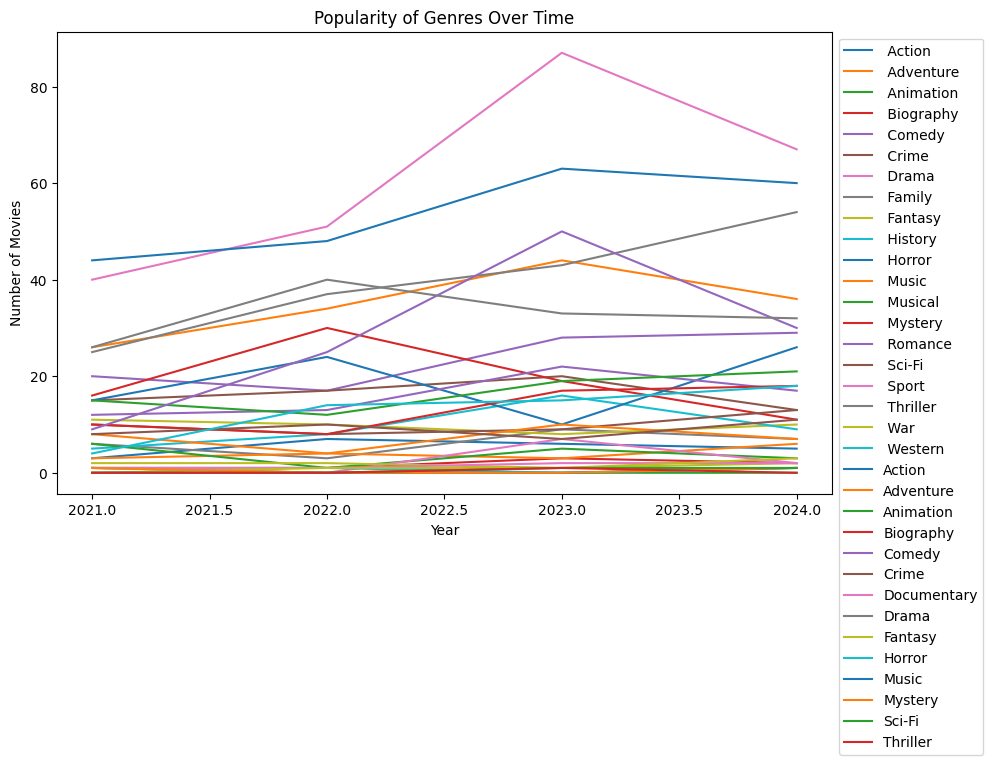

In [15]:
plt.figure(figsize=(10,6))
for genre in genre_year_pivot.columns:
    plt.plot(genre_year_pivot.index, genre_year_pivot[genre], label=genre)
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [16]:
genre_data = df.groupby('Genre').agg({
    'Title': 'count',
    'revenue': 'mean'
}).reset_index()
print(genre_data.head())

        Genre  Title     revenue
0      Action     21  161.827006
1   Adventure    140  291.522906
2   Animation      1    0.712229
3   Biography      7   41.888725
4      Comedy     94  227.187775


In [17]:
correlation = genre_data[['Title', 'revenue']].corr()
print(correlation)


            Title   revenue
Title    1.000000  0.260613
revenue  0.260613  1.000000


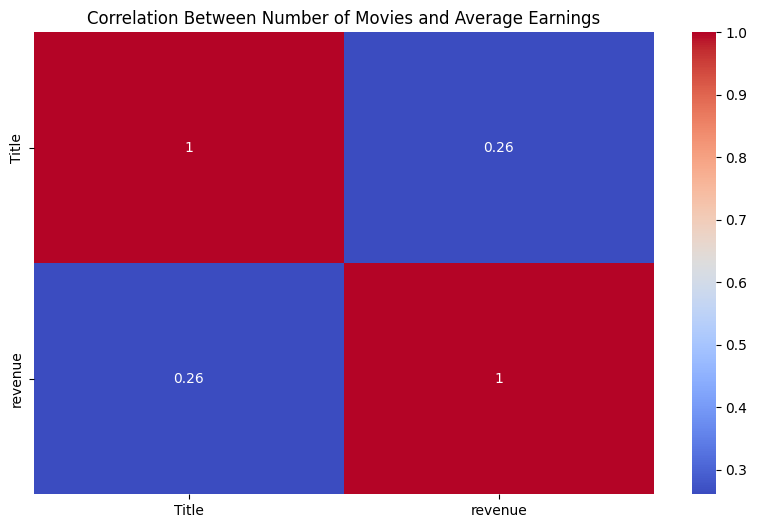

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Number of Movies and Average Earnings')
plt.show()

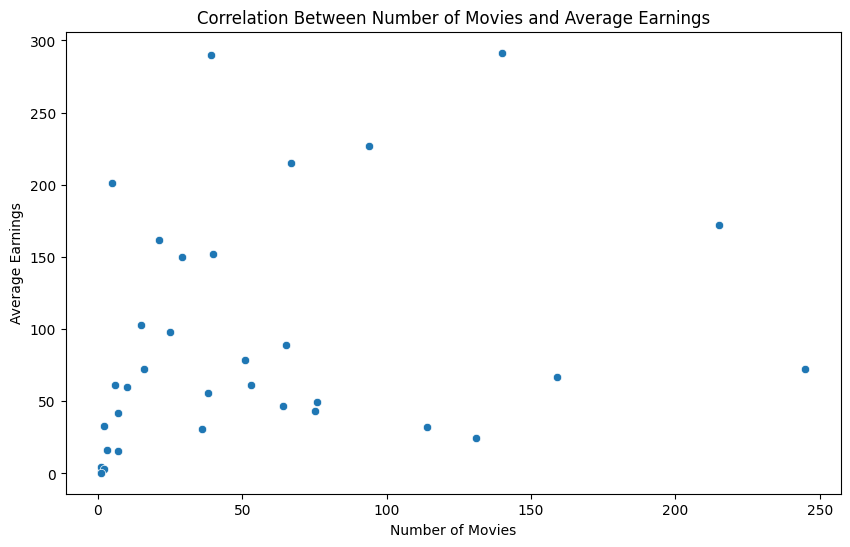

In [19]:


plt.figure(figsize=(10,6))
sns.scatterplot(x='Title', y='revenue', data=genre_data)
plt.title('Correlation Between Number of Movies and Average Earnings')
plt.xlabel('Number of Movies')
plt.ylabel('Average Earnings')
plt.show()



In [20]:

earnings_data = []

# Loop through each genre and append the earnings data to the list
for genre in df['Genre'].unique():
    earnings = df[df['Genre'] == genre]['revenue']
    earnings_data.append(earnings)

# Perform the ANOVA test
f_value, p_value = stats.f_oneway(*earnings_data)

print('F-value:', f_value)
print('P-value:', p_value)



F-value: 7.666121706072214
P-value: 4.6972177644457944e-33


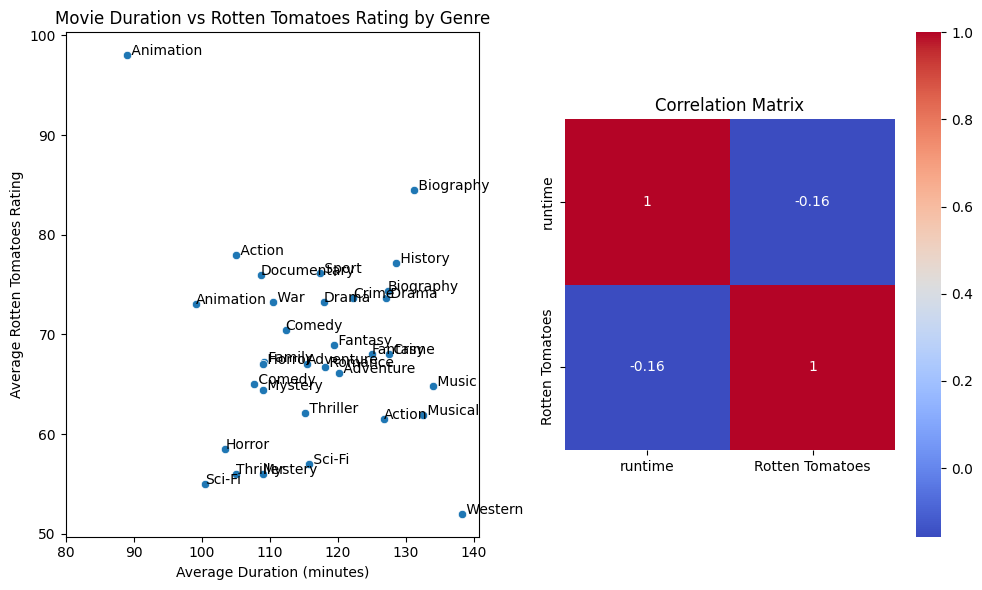


Correlation between Duration and Rotten Tomatoes Rating:
                  runtime  Rotten Tomatoes
runtime          1.000000        -0.157351
Rotten Tomatoes -0.157351         1.000000


In [ ]:
genre_rating_duration = df.groupby('Genre').agg({
    'runtime': 'mean',
    'Rotten Tomatoes': 'mean'
}).reset_index()

correlation = genre_rating_duration[['runtime', 'Rotten Tomatoes']].corr()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=genre_rating_duration, x='runtime', y='Rotten Tomatoes')
plt.title('Movie Duration vs Rotten Tomatoes Rating by Genre')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Average Rotten Tomatoes Rating')

min_duration = int(genre_rating_duration['runtime'].min() // 10 * 10)
max_duration = int(genre_rating_duration['runtime'].max() // 10 * 10 + 10)
plt.xticks(np.arange(min_duration, max_duration, 10))

for i, txt in enumerate(genre_rating_duration['Genre']):
    plt.annotate(txt, (genre_rating_duration['runtime'].iloc[i], 
                      genre_rating_duration['Rotten Tomatoes'].iloc[i]))

plt.subplot(1, 2, 2)
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

plt.tight_layout()
plt.show()

print("\nCorrelation between Duration and Rotten Tomatoes Rating:")
print(correlation)


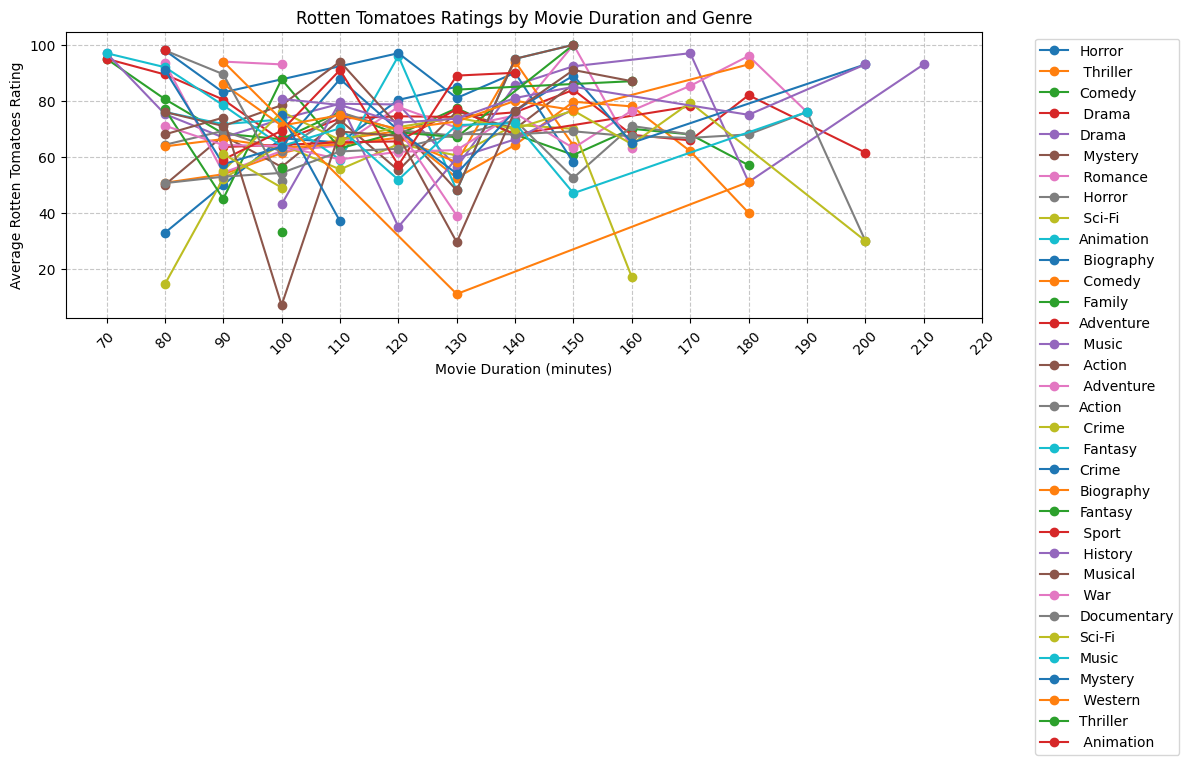

In [23]:
# Create bins for movie duration in 10-minute intervals
df['duration_bin'] = (df['runtime'] // 10 * 10).astype(int)

# Calculate mean Rotten Tomatoes rating for each duration bin and genre
duration_ratings = df.groupby(['duration_bin', 'Genre'])['Rotten Tomatoes'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
for genre in df['Genre'].unique():
    genre_data = duration_ratings[duration_ratings['Genre'] == genre]
    plt.plot(genre_data['duration_bin'], 
             genre_data['Rotten Tomatoes'], 
             marker='o', 
             label=genre)

plt.title('Rotten Tomatoes Ratings by Movie Duration and Genre')
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Average Rotten Tomatoes Rating')

# Set x-axis ticks every 10 minutes
min_duration = int(df['runtime'].min() // 10 * 10)
max_duration = int(df['runtime'].max() // 10 * 10 + 10)
plt.xticks(np.arange(min_duration, max_duration, 10), rotation=45)

# Add legend outside of plot to prevent overlap
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()